<a href="https://colab.research.google.com/github/aryasoni98/Doge_Coin_Predict/blob/master/Doge_Coin_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INSTALL THESE PACKAGES IF NEEDED

In [1]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.3MB 4.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=0e824683cda83f5db1b36268f1b060ac56596f6ed022ffc30cee24918cc7f69f
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp37-none-any.whl size=15192 sha256=b793d9617a106ee4735cdf93823089f314f16abebfc927977dc7ea1858e0c51d
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
import yfinance as yf
from yahoofinancials import YahooFinancials

#CREATING THE DATAFRAME TO STORE DATA


In [18]:
df = yf.download('ETH-USD', 
                      start='2021-01-01', 
                      end='2021-06-01', 
                      progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781


In [19]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,737.708374,749.201843,719.792236,730.367554,730.367554,13652004358
2021-01-02,730.402649,786.798462,718.109497,774.534973,774.534973,19740771179
2021-01-03,774.511841,1006.565002,771.561646,975.507690,975.507690,45200463368
2021-01-04,977.058838,1153.189209,912.305359,1040.233032,1040.233032,56945985763
2021-01-05,1041.498779,1129.371460,986.811279,1100.006104,1100.006104,41535932781


In [20]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-28,2742.468994,2761.363281,2336.361328,2419.906250,2419.906250,39999114805
2021-05-29,2414.067139,2566.938477,2208.490967,2279.514160,2279.514160,33773720220
2021-05-30,2278.288818,2472.187744,2188.834473,2390.305420,2390.305420,25876619428
2021-05-31,2387.198486,2715.854980,2279.505127,2714.945312,2714.945312,31007383150
2021-06-01,2707.560547,2739.737549,2531.160645,2633.518311,2633.518311,27363223090


In [21]:
series = df['Close'].values.reshape(-1, 1)

In [22]:
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

# Plot it

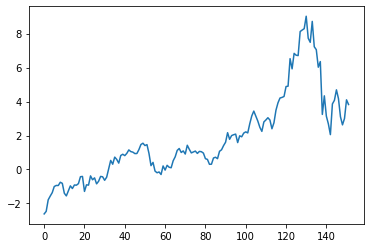

In [23]:
plt.plot(series)
plt.show()

In [24]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (142, 10) Y.shape (142,)


In [25]:
class BaselineModel:
  def predict(self, X):
    return X[:,-1]

In [26]:
Xtrain, Ytrain = X[:-N//2], Y[:-N//2]
Xtest, Ytest = X[-N//2:], Y[-N//2:]

In [27]:
model = BaselineModel()
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)

In [28]:
Ytrain2 = scaler.inverse_transform(Ytrain.reshape(-1, 1)).flatten()
Ytest2 = scaler.inverse_transform(Ytest.reshape(-1, 1)).flatten()
Ptrain2 = scaler.inverse_transform(Ptrain.reshape(-1, 1)).flatten()
Ptest2 = scaler.inverse_transform(Ptest.reshape(-1, 1)).flatten()

In [29]:
print("baseline train mae:", mae(Ytrain2, Ptrain2))
print("baseline test mae:", mae(Ytest2, Ptest2))

baseline train mae: 68.00797927211708
baseline test mae: 146.09300726232394


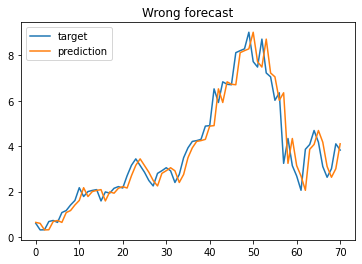

In [30]:
plt.plot(Ytest, label='target')
plt.plot(Ptest, label='prediction')
plt.legend()
plt.title("Wrong forecast")
plt.show()

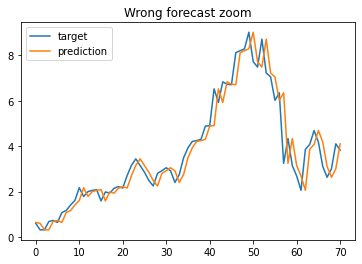

In [31]:
plt.plot(Ytest[0:100], label='target')
plt.plot(Ptest[0:100], label='prediction')
plt.legend()
plt.title("Wrong forecast zoom")
plt.show()

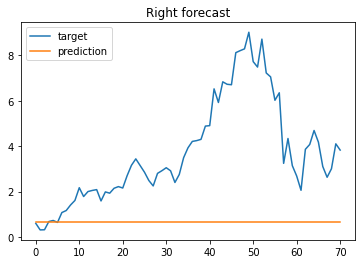

In [32]:
forecast = []
input_ = Xtest[0]
while len(forecast) < len(Ytest):
  f = model.predict(input_.reshape(1, T))[0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f
plt.plot(Ytest, label='target')
plt.plot(forecast, label='prediction')
plt.legend()
plt.title("Right forecast")
plt.show()